# 🏠 청년 금융/주택 정책 안내 챗봇

**개요**

청년들을 위한 금융 및 주택 정책 정보를 제공하는 지능형 RAG 챗봇입니다.

**주요 기능**

1. 📄 PDF 문서 기반 정책 정보 검색 (청년 금융/주택 정책 문서)
2. 🔍 관련성 체크를 통한 정확한 답변 제공
3. 🌐 웹 검색을 통한 최신 정책 정보 보완
4. 💬 대화 히스토리를 활용한 맥락 기반 상담

**워크플로우**

```
질문 입력
  ↓
PDF 문서 검색 (청년 정책 문서)
  ↓
관련성 체크
  ↓
관련 있음 → 문서 기반 답변
관련 없음 → 웹 검색 → 최신 정보 기반 답변
```

**대상 정책**

- 청년 전세자금 대출
- 청년 주택드림 대출
- 청년도약계좌
- 청년 버팀목 전세자금
- 생애최초 구입자금 대출
- 청년 특례 보금자리론
- 기타 청년 금융/주택 지원 정책


## 환경 설정


In [ ]:
# 필요한 패키지 설치 (한 번 실행할때마다 시간이 오래걸리므로 
# 처음에만 주석 해제하고 실행한 다음 다시 주석처리)

# !pip install -U langchain-teddynote
# !pip install -U langchain-upstage  # Upstage Solar 모델 사용
# !pip install -U langgraph
# !pip install -U faiss-cpu
# !pip install -U pypdf


  Using cached langchain_core-0.3.79-py3-none-any.whl.metadata (3.2 kB)
INFO: pip is looking at multiple versions of langgraph-prebuilt to determine which version is compatible with other requirements. This could take a while.
  Using cached langgraph_checkpoint-3.0.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached langgraph_checkpoint-2.1.2-py3-none-any.whl.metadata (4.2 kB)
  Using cached langgraph_checkpoint-2.1.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached langgraph_checkpoint-2.1.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached langgraph-1.0.2-py3-none-any.whl.metadata (7.4 kB)
INFO: pip is still looking at multiple versions of langgraph-prebuilt to determine which version is compatible with other requirements. This could take a while.
  Using cached langgraph-1.0.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached langgraph_prebuilt-1.0.1-py3-none-any.whl.metadata (5.0 kB)
Using cached langchain_core-0.3.79-py3-none-any.whl (449 kB)
Using cached langgraph-1.0.1-py3-non

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-classic 1.0.0 requires langchain-core<2.0.0,>=1.0.0, but you have langchain-core 0.3.79 which is incompatible.
langchain-classic 1.0.0 requires langchain-text-splitters<2.0.0,>=1.0.0, but you have langchain-text-splitters 0.3.11 which is incompatible.
langchain-upstage 0.7.4 requires pypdf<5.0.0,>=4.2.0, but you have pypdf 6.1.3 which is incompatible.
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


  Using cached langgraph-1.0.2-py3-none-any.whl.metadata (7.4 kB)
  Using cached langgraph_prebuilt-1.0.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached langchain_core-1.0.2-py3-none-any.whl.metadata (3.5 kB)
Using cached langgraph-1.0.2-py3-none-any.whl (156 kB)
Using cached langgraph_prebuilt-1.0.2-py3-none-any.whl (34 kB)
Using cached langchain_core-1.0.2-py3-none-any.whl (469 kB)

  Attempting uninstall: langchain-core

    Found existing installation: langchain-core 0.3.79

   ---------------------------------------- 0/3 [langchain-core]
   ---------------------------------------- 0/3 [langchain-core]
    Uninstalling langchain-core-0.3.79:
   ---------------------------------------- 0/3 [langchain-core]
   ---------------------------------------- 0/3 [langchain-core]
      Successfully uninstalled langchain-core-0.3.79
   ---------------------------------------- 0/3 [langchain-core]
   ---------------------------------------- 0/3 [langchain-core]
   ---------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.27 requires langchain-core<1.0.0,>=0.3.72, but you have langchain-core 1.0.2 which is incompatible.
langchain-classic 1.0.0 requires langchain-text-splitters<2.0.0,>=1.0.0, but you have langchain-text-splitters 0.3.11 which is incompatible.
langchain-openai 0.3.35 requires langchain-core<1.0.0,>=0.3.78, but you have langchain-core 1.0.2 which is incompatible.
langchain-upstage 0.7.4 requires langchain-core<0.4.0,>=0.3.78, but you have langchain-core 1.0.2 which is incompatible.
langchain-upstage 0.7.4 requires pypdf<5.0.0,>=4.2.0, but you have pypdf 6.1.3 which is incompatible.


In [ ]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv, find_dotenv

# API 키 정보 로드
load_dotenv(find_dotenv(), override=True)


find_dotenv(): c:\Users\주민우\langchain-kr-main\.env
TAVILY_API_KEY present: True
TAVILY_API_KEY preview: 'tvly-dev-I'


In [5]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("Youth-Finance-Housing-Chatbot")


LangChain/LangSmith API Key가 설정되지 않았습니다. 참고: https://wikidocs.net/250954


## PDF 문서 준비 및 Retrieval Chain 생성

### 📁 필요한 PDF 문서 (data 폴더에 준비)

다음과 같은 청년 금융/주택 정책 문서를 준비하세요:

1. **청년 주택 관련**
   - 청년 전세자금 대출 안내서
   - 청년 주택드림 대출 가이드
   - 버팀목 전세자금 대출 정보
   - 생애최초 구입자금 대출 안내

2. **청년 금융 관련**
   - 청년도약계좌 안내
   - 청년 금융지원 제도
   - 청년 저축 지원 정책

3. **정부 기관에서 다운로드 가능**
   - 주택도시기금 홈페이지 (www.nhuf.molit.go.kr)
   - 한국주택금융공사 (www.hf.go.kr)
   - 서민금융진흥원 (www.kinfa.or.kr)

**주의**: 실제 문서가 없어도 코드는 실행 가능하도록 구성되어 있습니다.
문서가 없으면 웹 검색으로 자동 전환됩니다.


In [44]:
from langchain_upstage import ChatUpstage, UpstageEmbeddings
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_community.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
import os

# 청년 금융/주택 정책 전문 프롬프트
YOUTH_POLICY_PROMPT = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """당신은 청년 금융 및 주택 정책 전문 상담사입니다.

**역할**
- 청년들의 금융 및 주택 관련 고민을 친절하고 명확하게 해결해주세요.
- 복잡한 정책을 쉽고 이해하기 쉽게 설명해주세요.
- 구체적인 신청 조건, 절차, 필요 서류를 안내해주세요.

**답변 원칙**
1. 제공된 컨텍스트를 기반으로 정확한 정보를 전달합니다.
2. 신청 자격, 대출 한도, 금리 등 핵심 정보를 빠짐없이 안내합니다.
3. 여러 정책이 있다면 비교하여 최적의 선택을 도와줍니다.
4. 불확실한 정보는 추측하지 않고 확인이 필요하다고 안내합니다.
5. 친근하고 공감하는 톤으로 대화합니다.

**답변 형식**
- 핵심 내용을 먼저 제시하고, 상세 정보를 이어서 설명합니다.
- 조건이 있는 경우 명확하게 구분하여 설명합니다.
- 필요시 단계별로 정리하여 안내합니다.

**제공된 컨텍스트**
{context}

**사용자 프로필(있으면 반영)**
{user_profile}

**이전 대화 내역**
{chat_history}
""",
        ),
        ("human", "{question}"),
    ]
)

# Upstage Solar LLM 및 체인 생성
# solar-mini: 빠르고 효율적 (추천)
# solar-pro: 더 강력한 성능
llm = ChatUpstage(model="solar-mini", temperature=0)
youth_policy_chain = YOUTH_POLICY_PROMPT | llm | StrOutputParser()

print("✅ 청년 금융/주택 정책 전문 체인이 생성되었습니다. (Upstage Solar 사용)")


✅ 청년 금융/주택 정책 전문 체인이 생성되었습니다. (Upstage Solar 사용)


In [45]:
# PDF 문서 로드 및 Retriever 생성 (data/ 이하 모든 PDF 자동 스캔)
from glob import glob

# data/ 및 하위 폴더의 모든 PDF 수집 (대소문자 확장자 모두)
PDF_FILES = sorted({
    *glob("data/**/*.pdf", recursive=True),
    *glob("data/**/*.PDF", recursive=True),
})

# PDF 파일이 존재하는지 확인
existing_files = [f for f in PDF_FILES if os.path.isfile(f)]

if existing_files:
    print(f"📄 감지된 PDF 파일 수: {len(existing_files)}")
    for i, p in enumerate(existing_files[:10], 1):
        print(f"  - [{i}] {p}")
    if len(existing_files) > 10:
        print(f"  ... 외 {len(existing_files)-10}개")
    
    # PDF 로드
    documents = []
    for file_path in existing_files:
        loader = PyPDFLoader(file_path)
        documents.extend(loader.load())
    
    # 텍스트 분할
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=200
    )
    splits = text_splitter.split_documents(documents)
    
    # 벡터스토어 생성 (Upstage Embeddings 사용)
    vectorstore = FAISS.from_documents(splits, UpstageEmbeddings(model="solar-embedding-1-large"))
    pdf_retriever = vectorstore.as_retriever(
        search_type="similarity",
        search_kwargs={"k": 4}
    )
    
    print(f"✅ {len(splits)}개의 문서 청크가 생성되었습니다.")
    HAS_PDF = True
else:
    print("⚠️ data/ 폴더에서 PDF를 찾지 못했습니다. 모든 질문은 웹 검색으로 처리됩니다.")
    print("\n💡 PDF 문서를 준비하시려면:")
    print("   1. data/ 폴더(또는 하위 폴더)에 PDF를 넣으세요")
    print("   2. 이 셀을 다시 실행하세요\n")
    
    # 더미 retriever 생성 (항상 빈 결과 반환)
    class DummyRetriever:
        def invoke(self, query):
            return []
    
    pdf_retriever = DummyRetriever()
    HAS_PDF = False


📄 감지된 PDF 파일 수: 2
  - [1] data\2025년포천시청포도청년주택(청년매입임대주택)입주자모집공고문.pdf
  - [2] data\미취업 청년의 취업준비 실태조사 보고서경총.pdf
✅ 63개의 문서 청크가 생성되었습니다.


## State 정의

Graph의 노드 간 공유하는 상태를 정의합니다.


In [46]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages


# GraphState 상태 정의
class GraphState(TypedDict):
    question: Annotated[str, "Question"]  # 사용자 질문
    context: Annotated[str, "Context"]  # 검색된 컨텍스트
    answer: Annotated[str, "Answer"]  # 생성된 답변
    messages: Annotated[list, add_messages]  # 대화 히스토리
    relevance: Annotated[str, "Relevance"]  # 관련성 체크 결과 ("yes" or "no")
    search_source: Annotated[str, "SearchSource"]  # 정보 출처 ("pdf" or "web")
    user_profile: Annotated[dict, "UserProfile"]  # 사용자 프로필(예: {"age": 29, "income": 3200, "region": "경기"})


## 노드(Node) 정의

각 단계를 처리하는 노드를 정의합니다.


In [48]:
from langchain_teddynote.evaluator import GroundednessChecker
from langchain_teddynote.messages import messages_to_history
from langchain_teddynote.tools.tavily import TavilySearch


def format_docs(docs):
    """문서를 포맷팅합니다."""
    if not docs:
        return ""
    return "\n\n".join([doc.page_content for doc in docs])


# 1. PDF 문서 검색 노드
def retrieve_document(state: GraphState) -> GraphState:
    """PDF 문서에서 관련 정보를 검색합니다."""
    question = state["question"]
    
    print(f"\n🔍 PDF 문서 검색 중: {question[:50]}...")
    
    # 문서 검색
    retrieved_docs = pdf_retriever.invoke(question)
    
    # 문서 포맷팅
    context = format_docs(retrieved_docs)
    
    if context:
        print(f"✅ {len(retrieved_docs)}개의 관련 문서를 찾았습니다.")
    else:
        print("⚠️ 관련 문서를 찾지 못했습니다.")
    
    return GraphState(context=context, search_source="pdf")


# 2. 관련성 체크 노드
def relevance_check(state: GraphState) -> GraphState:
    """검색된 문서의 관련성을 체크합니다."""
    # 컨텍스트가 없으면 관련성 없음
    if not state.get("context") or state["context"].strip() == "":
        print("\n📊 관련성 체크: ❌ NO (문서 없음)")
        return GraphState(relevance="no")
    
    # 관련성 평가기 생성 (Upstage Solar 사용)
    checker = GroundednessChecker(
        llm=ChatUpstage(model="solar-mini", temperature=0),
        target="question-retrieval"
    ).create()
    
    # 관련성 평가
    result = checker.invoke({
        "question": state["question"],
        "context": state["context"]
    })
    
    relevance = result.score  # "yes" or "no"
    
    print(f"\n📊 관련성 체크: {'✅ YES' if relevance == 'yes' else '❌ NO'}")
    
    return GraphState(relevance=relevance)


# 3. 웹 검색 노드 (청년 정책 특화)
def web_search(state: GraphState) -> GraphState:
    """웹에서 최신 청년 금융/주택 정책 정보를 검색합니다."""
    question = state["question"]
    
    print(f"\n🌐 웹 검색 중: {question[:50]}...")
    
    # 검색 쿼리 최적화 (청년 정책 키워드 추가)
    if "청년" not in question:
        enhanced_query = f"청년 {question}"
    else:
        enhanced_query = question
    
    # Tavily 검색 수행
    tavily = TavilySearch()
    search_results = tavily.search(
        query=enhanced_query,
        topic="general",
        max_results=5,
        format_output=True,
    )
    
    print("✅ 웹 검색 완료")
    
    return GraphState(context=search_results, search_source="web")


# 4. 답변 생성 노드
def llm_answer(state: GraphState) -> GraphState:
    """컨텍스트를 기반으로 답변을 생성합니다."""
    question = state["question"]
    context = state["context"]
    
    print("\n💬 답변 생성 중...")
    
    # 답변 생성
    response = youth_policy_chain.invoke({
        "question": question,
        "context": context,
        "chat_history": messages_to_history(state.get("messages", [])),
        "user_profile": state.get("user_profile", {})
    })
    
    # 정보 출처 안내 추가
    source = state.get("search_source", "unknown")
    source_text = {
        "pdf": "📄 *[출처: 업로드된 정책 문서]*",
        "web": "🌐 *[출처: 웹 검색 결과 - 최신 정보일 수 있으니 공식 사이트에서 확인을 권장합니다]*"
    }.get(source, "")
    
    final_answer = f"{response}\n\n{source_text}"
    
    print("✅ 답변 생성 완료")
    
    return GraphState(
        answer=final_answer,
        messages=[("user", question), ("assistant", final_answer)]
    )


# 5. 관련성 라우팅 함수
def is_relevant(state: GraphState) -> str:
    """관련성 체크 결과에 따라 다음 노드를 결정합니다."""
    if state["relevance"] == "yes":
        return "relevant"
    else:
        return "not_relevant"


print("✅ 모든 노드가 정의되었습니다.")


✅ 모든 노드가 정의되었습니다.


## 워크플로우 그래프 생성

노드와 엣지를 연결하여 워크플로우를 구성합니다.


In [49]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver

# 그래프 생성
workflow = StateGraph(GraphState)

# 노드 추가
workflow.add_node("retrieve", retrieve_document)  # PDF 검색
workflow.add_node("relevance_check", relevance_check)  # 관련성 체크
workflow.add_node("web_search", web_search)  # 웹 검색
workflow.add_node("llm_answer", llm_answer)  # 답변 생성

# 엣지 추가
workflow.add_edge("retrieve", "relevance_check")  # 검색 → 관련성 체크

# 조건부 엣지 (관련성에 따라 분기)
workflow.add_conditional_edges(
    "relevance_check",
    is_relevant,
    {
        "relevant": "llm_answer",  # 관련 있음 → 답변 생성
        "not_relevant": "web_search"  # 관련 없음 → 웹 검색
    }
)

workflow.add_edge("web_search", "llm_answer")  # 웹 검색 → 답변 생성
workflow.add_edge("llm_answer", END)  # 답변 생성 → 종료

# 진입점 설정
workflow.set_entry_point("retrieve")

# 메모리 설정 (대화 히스토리 저장)
memory = MemorySaver()

# 그래프 컴파일
app = workflow.compile(checkpointer=memory)

print("✅ 청년 금융/주택 챗봇 그래프가 생성되었습니다!")


✅ 청년 금융/주택 챗봇 그래프가 생성되었습니다!


## 그래프 시각화


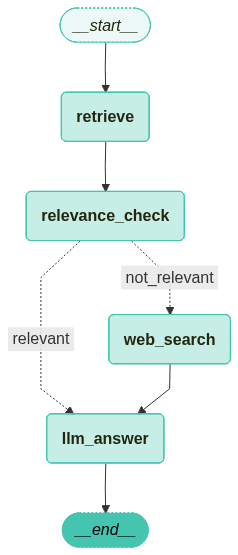

In [50]:
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(app)


## 챗봇 실행

이제 청년 금융/주택 챗봇을 실행해봅시다!


In [51]:
from langchain_core.runnables import RunnableConfig
from langchain_teddynote.messages import invoke_graph, stream_graph, random_uuid


def ask_question(question: str, thread_id: str = None, user_profile: dict | None = None):
    """질문을 하고 답변을 받습니다."""
    # thread_id가 없으면 새로 생성 (새로운 대화 시작)
    if thread_id is None:
        thread_id = random_uuid()
    
    # 설정
    config = RunnableConfig(
        recursion_limit=10,
        configurable={"thread_id": thread_id}
    )
    
    # 입력
    inputs = GraphState(question=question, user_profile=(user_profile or {}))
    
    print("="*70)
    print(f"💬 질문: {question}")
    print("="*70)
    
    # 실행 (스트리밍)
    stream_graph(app, inputs, config, ["relevance_check", "llm_answer"])
    
    # 최종 상태 가져오기
    final_state = app.get_state(config).values
    
    # 최종 답변을 명시적으로 출력
    print("\n" + "="*70)
    print(final_state.get("answer", ""))
    
    return final_state, thread_id


print("✅ 질문 함수가 준비되었습니다. ask_question('질문 내용')으로 사용하세요!")


✅ 질문 함수가 준비되었습니다. ask_question('질문 내용')으로 사용하세요!


## 💡 테스트 예제

다양한 질문으로 챗봇을 테스트해봅시다!


In [15]:
# 예제 1: 청년 전세자금 대출 질문
result, thread_id = ask_question("청년 전세자금 대출 조건이 어떻게 되나요?")


💬 질문: 청년 전세자금 대출 조건이 어떻게 되나요?

🔍 PDF 문서 검색 중: 청년 전세자금 대출 조건이 어떻게 되나요?...
⚠️ 관련 문서를 찾지 못했습니다.

📊 관련성 체크: ❌ NO (문서 없음)

🌐 웹 검색 중: 청년 전세자금 대출 조건이 어떻게 되나요?...
✅ 웹 검색 완료

💬 답변 생성 중...

🔄 Node: llm_answer 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
청년 전세자금 대출 중 하나인 '청년 버팀목 전세자금 대출'의 조건을 요약해 드리겠습니다.

### 대출 대상
- **연령**: 만 19세 이상 만 34세 이하의 세대주(예비 세대주 포함)
- **소득**: 부부합산 연소득 5천만원 이하
- **자산**: 본인 순자산가액 3.37억원 이하 (2025년 기준)
- **주택 소유 여부**: 세대주(예정자)를 포함한 세대원(예정자) 모두가 무주택
- **전세 계약**: 전세 계약 체결 및 전세보증금의 5% 이상 납입

### 대출 금리
- **기본 금리**: 부부합산 연소득에 따라 연 2.2% ~ 3.3%
- **우대 금리**: 기초생활수급권자, 차상위계층, 한부모가구 등에게 연 1.0%p 우대
- **추가 우대 금리**: 주거안정 월세대출 성실납부자, 부동산 전자계약 체결 등에게 추가 우대

### 대출 한도
- 최대 1.5억원 이내 (만 25세 미만 단독세대주인 경우 1.2억원)
- 전세보증금의 80% 이내

### 대출 기간
- 최초 2년, 최대 10년까지 연장 가능

### 대상 주택
- 전용면적 85㎡ 이하 주택(주거용 오피스텔 포함)
- 전세보증금 3억원 이하

### 필요 서류
- 본인 신분증
- 전세계약서
- 전세보증금 5% 이상 납입 영수증
- 전셋집 건물 등기사항전부증명서
- 주민등록등본, 가족관계증명서
- 건강보험자격득실확인서
- 재직 및✅ 답변 생성 완료
 소득 확인 서류

이 외에도 다른 청년 전세자금 대출 상품이 있을 수 있으니, 자세한 내용은 주택

In [16]:
# 예제 2: 청년도약계좌 질문 (최신 정보)
result, thread_id = ask_question("2025년 청년도약계좌 신청 방법 알려주세요")


💬 질문: 2025년 청년도약계좌 신청 방법 알려주세요

🔍 PDF 문서 검색 중: 2025년 청년도약계좌 신청 방법 알려주세요...
⚠️ 관련 문서를 찾지 못했습니다.

📊 관련성 체크: ❌ NO (문서 없음)

🌐 웹 검색 중: 2025년 청년도약계좌 신청 방법 알려주세요...
✅ 웹 검색 완료

💬 답변 생성 중...

🔄 Node: llm_answer 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
2025년 청년도약계좌 신청 방법은 다음과 같습니다.

### 신청 기간
- **매월 초**: 신청 기간은 매월 초에 열리며, 정확한 일정은 서민금융진흥원 홈페이지에서 공지됩니다.

### 신청 방법
1. **온라인 신청**: 청년도약계좌 취급은행 앱을 통해 비대면 가입 신청 및 계좌 개설이 가능합니다.
   - **신청 기간**: 매월 초에 신청 가능하며, 세부 일정은 서민금융진흥원 홈페이지와 청년도약계좌 홈페이지에서 안내됩니다.
   - **신청 절차**:
     1. 청년도약계좌 취급은행 앱을 통해 비대면 가입 신청 및 계좌 개설을 진행합니다.
     2. 외국인인 경우, 신청은 비대면으로, 가입은 대면으로 진행합니다.
     3. 협약은행: KB국민, 신한, 우리, 하나, IBK기업, NH농협, 부산, 광주, 전북, 경남, iM뱅크(구 대구은행)

### 필요 서류
- **개인 신분증**: 주민등록증 또는 운전면허증
- **소득 증빙 서류**: 직전 과세기간의 소득을 증명할 수 있는 서류 (예: 근로소득 원천징수영수증, 종합소득세 신고서)
- **가구원 정보**: 주민등록등본 또는 가족관계증명서 (가구원 수 확인용)

### 유의사항
- **1인 1계좌**: 1인당 1개의 계좌만 가입 가능합니다.
- **중복가입 불가**: 청년희망적금과 중복가입은 불가능합니다.
- **중도해지 시 주의**: 중도해지 시 정부 기여금과 비과세 혜택을 일부 또는 전부 상실할 수 있습니다.

### 추가 정보
- **서민

In [17]:
# 예제 3: 대화 히스토리를 활용한 후속 질문
# 먼저 첫 번째 질문
result1, tid = ask_question("청년 버팀목 전세자금 대출에 대해 설명해주세요")

print("\n" + "#"*70 + "\n")

# 같은 thread_id로 후속 질문 (이전 대화 기억)
result2, tid = ask_question("신청하려면 어떤 서류가 필요한가요?", thread_id=tid)


💬 질문: 청년 버팀목 전세자금 대출에 대해 설명해주세요

🔍 PDF 문서 검색 중: 청년 버팀목 전세자금 대출에 대해 설명해주세요...
⚠️ 관련 문서를 찾지 못했습니다.

📊 관련성 체크: ❌ NO (문서 없음)

🌐 웹 검색 중: 청년 버팀목 전세자금 대출에 대해 설명해주세요...
✅ 웹 검색 완료

💬 답변 생성 중...

🔄 Node: llm_answer 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
청년 버팀목 전세자금 대출은 주택도시기금이 제공하는 저금리 전세자금 대출 상품으로, 만 19세 이상 34세 이하의 청년을 대상으로 합니다. 이 대출은 상대적으로 주택을 소유하기 어려운 청년층, 사회초년생, 신혼부부 등이 주거안정을 위해 이용할 수 있습니다.

### 주요 특징
- **대출금리**: 연 2.2% ~ 3.3% (부부합산 연소득 및 임차보증금에 따라 다름)
- **대출한도**: 최대 1.5억원 이내 (임차보증금의 80% 이내)
- **대출기간**: 최초 2년 (4회 연장 가능, 최장 10년 이용 가능)
- **대상 주택**: 임차 전용면적 85㎡ 이하 주택 (주거용 오피스텔 포함) 및 채권양도협약기관 소유의 기숙사 (호수가 구분되어 있고 전입신고가 가능한 경우)
- **대출 신청 조건**: 부부합산 연소득 5천만원 이하, 순자산가액 3.37억원 이하 무주택 세대주(예비세대주 포함)

### 우대 조건
- **중소기업 취업(창업) 청년**: 연 0.3%p 우대금리 적용 가능
- **추가 우대금리**: 주거안정 월세대출 성실납부자, 부동산 전자계약 체결, 청년가구 등 다양한 조건에 따라 추가 우대금리가 적용될 수 있습니다.

### 신청 방법
- 주택도시기금 홈페이지(https://nhuf.molit.go.kr) 또는 수탁은행을 통해 신청 가능합니다.

청년 버팀목 전세자금 대출은 청년층의 주거비 부담을 줄이고 주거안정을 도모하는 데 도움이 되는 상품입니다. 자세한 내용은 주택도시기금 홈페이지를 참조

## 🎮 대화형 챗봇

계속해서 질문할 수 있는 대화형 인터페이스입니다.


In [52]:
# 대화형 챗봇 실행
def chat():
    """대화형 챗봇을 실행합니다."""
    print("🏠 청년 금융/주택 정책 안내 챗봇")
    print("="*70)
    print("청년 금융 및 주택 정책에 대해 무엇이든 물어보세요!")
    print("종료하려면 'quit'를 입력하세요.")
    print("="*70 + "\n")
    
    # 새로운 대화 시작
    thread_id = random_uuid()
    
    while True:
        try:
            # 사용자 입력
            question = input("\n💬 질문: ").strip()
            
            # 종료 명령어 체크
            if question.lower() in ['quit']:
                print("\n👋 챗봇을 종료합니다. 감사합니다!")
                break
            
            # 빈 입력 처리
            if not question:
                print("⚠️ 질문을 입력해주세요.")
                continue
            
            # 질문 처리
            _, thread_id = ask_question(question, thread_id=thread_id)
            
        except KeyboardInterrupt:
            print("\n\n👋 챗봇을 종료합니다.")
            break
        except Exception as e:
            print(f"\n❌ 오류가 발생했습니다: {e}")
            continue

# 대화 시작
chat()  # 주석을 해제하고 실행하세요


🏠 청년 금융/주택 정책 안내 챗봇
청년 금융 및 주택 정책에 대해 무엇이든 물어보세요!
종료하려면 'quit'를 입력하세요.

💬 질문: 포천 청포도 청년주택(청년 매입임대주택) 입주자 모집공고에 대해서 알려줘

🔍 PDF 문서 검색 중: 포천 청포도 청년주택(청년 매입임대주택) 입주자 모집공고에 대해서 알려줘...
✅ 4개의 관련 문서를 찾았습니다.

🔄 Node: relevance_check 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 

📊 관련성 체크: ✅ YES

💬 답변 생성 중...

🔄 Node: llm_answer 🔄
- - - - - - - - - - - - - - - - - - - - - - - - - 
포천 청포도 청년주택(청년 매입임대주택)은 LH 매입임대주택을 포천시 소재 직장에 취업 또는 창업 중인 청년(19세 ~ 39세)을 대상으로 시중 시세의 40~50% 수준으로 임대하는 주택입니다. 안정적인 주거환경을 제공하고 장기 정착을 유도하기 위해 입주대상자를 모집하고 있습니다.

### 주요 내용

1. **모집일정**
   - 모집공고일: 2025년 10월 27일
   - 신청기간: 2025년 11월 10일 ~ 11월 12일
   - 자격검증: 2025년 11월 17일 ~ 12월 16일
   - 예비입주자 발표: 2025년 12월 19일
   - 계약체결: 계약일부터 60일 이내

2. **공급대상 주택**
   - 포천 청포도(청년 매입임대주택) 24호 (포천로1585번길 8 포천헤리센트)
   - 임대료는 계약 시 일부 변경될 수 있습니다.

3. **예비입주자 모집인원**
   - 48명

4. **임대기간 및 임대조건**
   - 최초 임대기간: 2년
   - 재계약 가능: 4회 (자격 충족 시 최장 10년 거주)

5. **신청자격**
   - 포천시 거주(주소) 중인 무주택 청년(19세 이상 ~ 39세 이하)
   - 포천시 소재 직장 취업 청년 또는 창업 청년

6. **신

## 📚 사용 가이드

### 질문 예시

**청년 주택 관련**
- "청년 전세자금 대출 조건이 어떻게 되나요?"
- "생애최초 주택 구입 시 받을 수 있는 지원이 있나요?"
- "버팀목 전세자금 대출 금리는 얼마인가요?"
- "청년 주택드림 대출과 일반 주택담보대출의 차이는?"

**청년 금융 관련**
- "청년도약계좌 가입 조건 알려주세요"
- "청년 저축 지원 정책에는 어떤 것들이 있나요?"
- "청년 금융 지원 제도 비교해주세요"

**맞춤형 상담**
- "무주택 청년인데 어떤 지원을 받을 수 있나요?"
- "연소득 3000만원인 청년이 받을 수 있는 대출은?"
- "신혼부부 대상 주택 지원 정책 알려주세요"

### 챗봇의 강점

1. **하이브리드 검색**: PDF 문서 + 웹 검색으로 최신 정보 제공
2. **관련성 체크**: 정확한 답변을 위한 자동 검증
3. **대화 히스토리**: 맥락을 이해하는 연속적인 대화
4. **출처 표시**: 정보의 출처를 명확하게 안내

### 주의사항

- 📄 PDF 문서가 없으면 모든 답변이 웹 검색으로 처리됩니다
- 🌐 웹 검색 결과는 최신 정보이지만 공식 사이트에서 재확인을 권장합니다
- 🔑 실제 대출 신청 시에는 금융기관에 직접 문의하세요
- ⚡ API 키 (Upstage, Tavily)가 필요합니다


## 🚀 다음 단계

### 기능 확장 아이디어

1. **사용자 프로필 기반 추천**
   - 나이, 소득, 무주택 여부 등 입력받아 맞춤형 정책 추천

2. **정책 비교 테이블**
   - 여러 대출 상품을 표로 비교

3. **신청 절차 가이드**
   - 단계별 체크리스트 생성

4. **서류 준비 도우미**
   - 필요 서류 목록 자동 생성

5. **금리 계산기**
   - 대출 조건별 이자 계산

6. **알림 기능**
   - 신청 기간 알림

### PDF 문서 추가 방법

1. `data/` 폴더 생성
2. 청년 금융/주택 관련 PDF 다운로드
   - [주택도시기금](https://www.nhuf.molit.go.kr)
   - [한국주택금융공사](https://www.hf.go.kr)
   - [서민금융진흥원](https://www.kinfa.or.kr)
3. PDF_FILES 리스트에 경로 추가
4. 셀 재실행

### 배포 옵션

- **Streamlit**: 웹 앱으로 배포
- **FastAPI**: REST API 서버 구축
- **Discord/Telegram Bot**: 메신저 봇 연동
- **KakaoTalk Chatbot**: 카카오톡 채널 연동


## ✅ 완성!

청년 금융/주택 정책 안내 챗봇이 준비되었습니다! 🎉

위의 테스트 예제를 실행하거나 `chat()` 함수로 대화형 챗봇을 시작해보세요!
